## PCA implementation

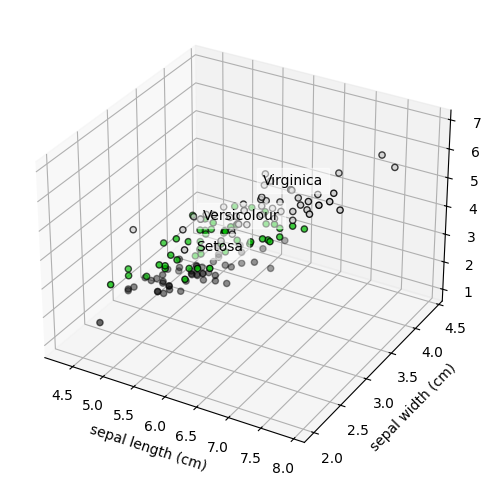

In [1]:
# Import necessary libraries
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create a 3D plot
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor='k')

# Annotate the plot with class names
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 0.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=0.5, edgecolor='w', facecolor='w'))

# Set labels for the axes
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])

# Display the plot
plt.show()


In [2]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
X[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

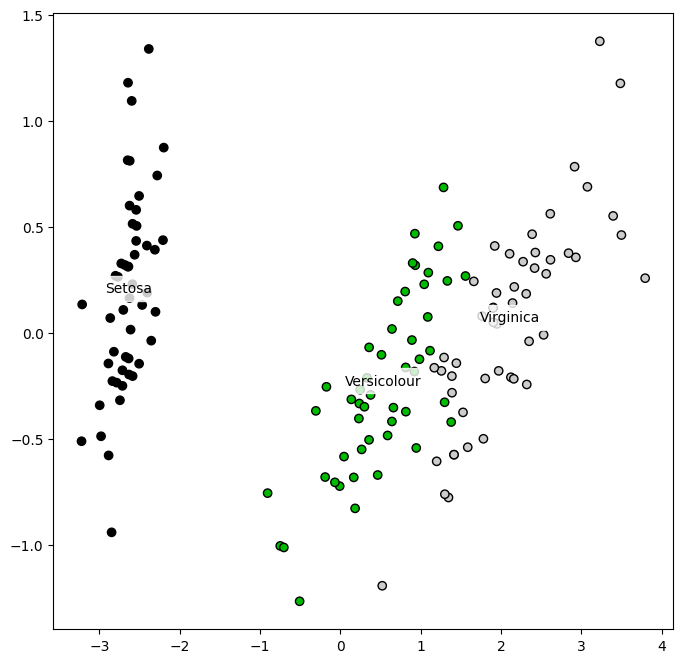

In [3]:
fig = plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.nipy_spectral, edgecolor='k')
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
 plt.text(X[y == label, 0].mean(), X[y == label, 1].mean(), 
name, horizontalalignment='center', bbox=dict(alpha=0.8, 
edgecolor='w', facecolor='w'))
plt.show()

## K-Means Implementation

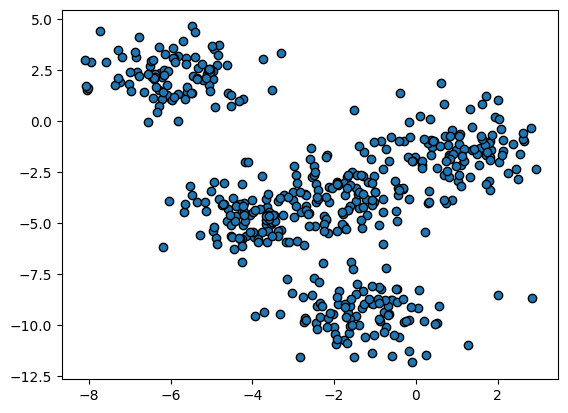

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, centers=5, n_features=2, random_state=2)
plt.scatter(X[:,0], X[:,1], edgecolor='k')

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [6]:
y = kmeans.predict(X)

In [7]:
kmeans.cluster_centers_

array([[  0.80353826,  -1.59385187],
       [ -1.13483326,  -8.41801844],
       [ -5.92952036,   2.24987809],
       [ -1.39389671, -10.1770318 ],
       [ -3.11454325,  -4.27299109]])

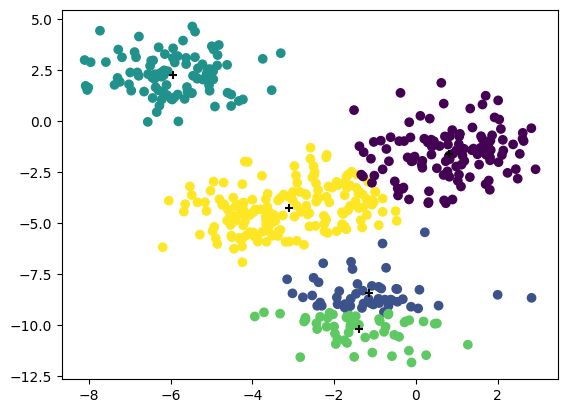

In [8]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
c='black', marker='+')

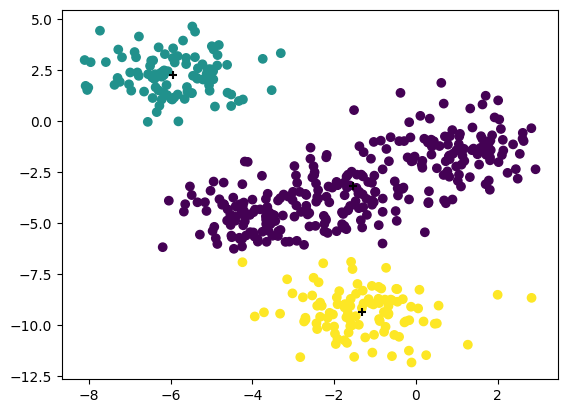

In [9]:
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='+')

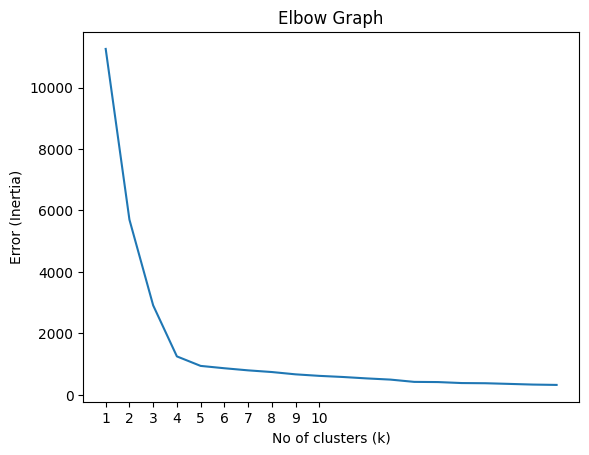

In [10]:
error = []
for i in range(1,21):
 kmeans = KMeans(n_clusters=i).fit(X)
 error.append(kmeans.inertia_)
plt.plot(range(1,21), error)
plt.title("Elbow Graph")
plt.xlabel("No of clusters (k)")
plt.ylabel("Error (Inertia)")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.show()

## Clustering using DBSCAN

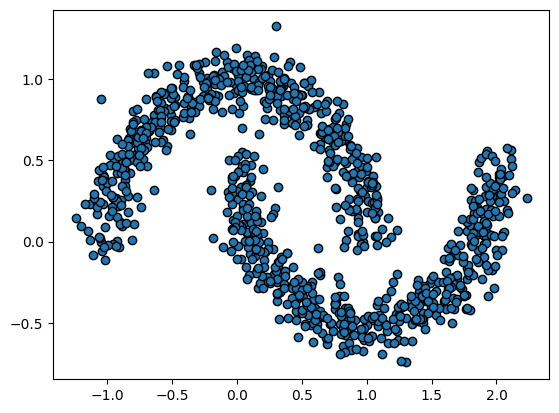

In [11]:
from sklearn.datasets import make_moons, make_circles
X, y = make_moons(n_samples=1000, noise=0.1)
plt.scatter(X[:,0], X[:,1], edgecolor='k')

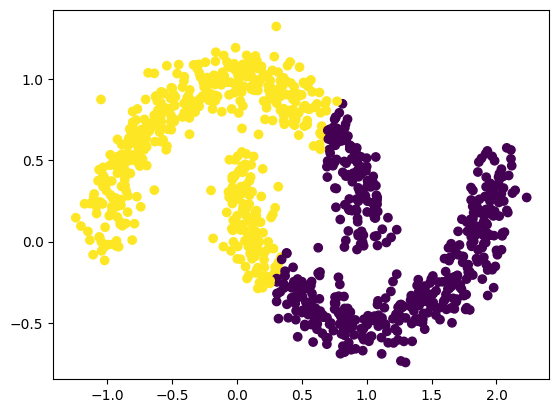

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
y= kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y)

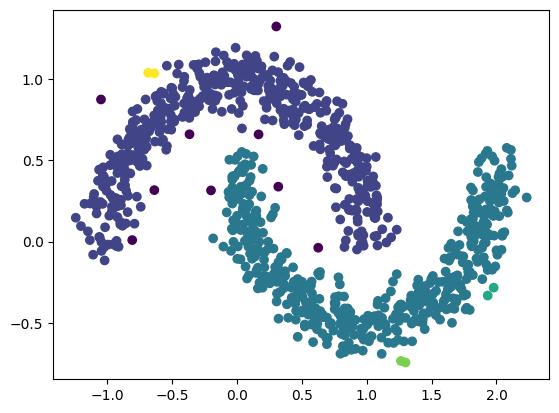

In [13]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=2)
y= dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y)